**Michelle Njio Piters - 0706022210045**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/chellee18/DataMining/refs/heads/main/week%207/bank.csv"
df = pd.read_csv(url, delimiter=';')
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
68,41,management,married,secondary,no,0,no,yes,cellular,7,jul,630,3,-1,0,unknown,no
648,29,entrepreneur,married,secondary,no,178,yes,no,cellular,5,may,231,4,-1,0,unknown,no
1517,53,unknown,married,unknown,no,13,no,no,telephone,28,jan,69,1,-1,0,unknown,no
2779,52,management,married,secondary,no,-588,yes,no,cellular,22,jul,81,4,-1,0,unknown,no
2589,45,entrepreneur,divorced,tertiary,no,1273,yes,yes,unknown,11,jun,197,3,-1,0,unknown,no
2804,28,admin.,single,secondary,no,775,no,no,cellular,29,jan,603,2,-1,0,unknown,no
2594,48,admin.,married,secondary,no,292,yes,yes,cellular,29,jul,164,6,-1,0,unknown,no
224,54,management,married,primary,no,1691,yes,no,cellular,20,nov,186,1,-1,0,unknown,no
3940,24,student,single,secondary,no,1847,no,no,cellular,9,dec,390,1,-1,0,unknown,no
2453,29,management,married,tertiary,no,581,yes,yes,cellular,14,jul,192,2,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.dropna(inplace=True)
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

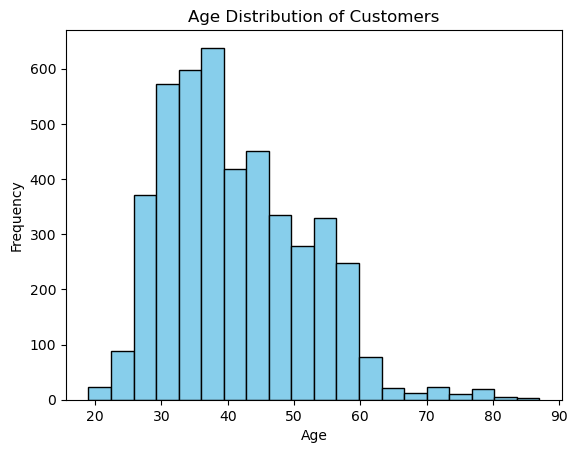

In [7]:
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Grafik histogram ini menunjukkan distribusi usia pelanggan. Mayoritas pelanggan berada di rentang usia 30-50 tahun, 
#dengan puncak sekitar usia 40 tahun. Distribusi menurun secara signifikan setelah usia 50, 
#dan sangat sedikit pelanggan berusia di atas 60. Hal ini menunjukkan bahwa kelompok usia menengah merupakan sebagian besar dari populasi pelanggan.

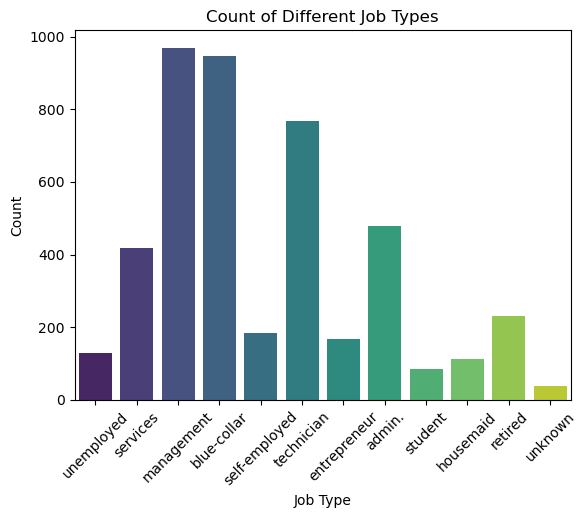

In [8]:
sns.countplot(x='job', data=df, palette='viridis')
plt.title('Count of Different Job Types')
plt.xticks(rotation=45)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

#Histogram ini menggambarkan distribusi usia pelanggan bank, dengan sebagian besar pelanggan berada dalam rentang usia 30 
#hingga 40 tahun. Frekuensi tertinggi terlihat pada kelompok usia sekitar 35-40 tahun, 
#menunjukkan bahwa bank ini memiliki basis pelanggan yang dominan di usia muda hingga menengah. 
#Distribusi usia ini menyerupai pola distribusi normal, namun sedikit condong ke arah usia yang lebih muda, 
#menandakan bahwa kelompok usia produktif merupakan mayoritas pelanggan bank ini.

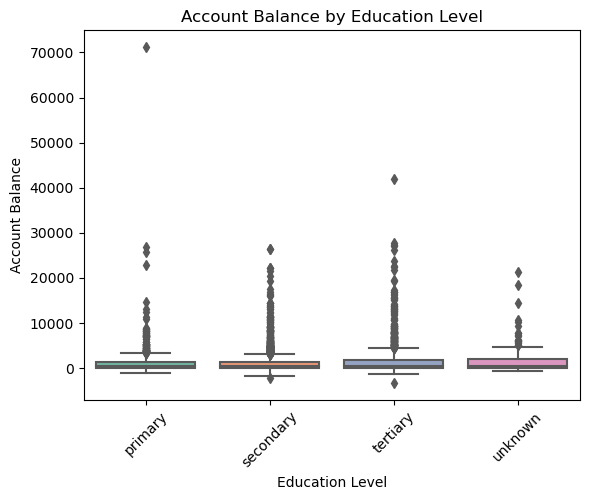

In [9]:
sns.boxplot(x='education', y='balance', data=df, palette='Set2')
plt.title('Account Balance by Education Level')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Account Balance')
plt.show()

#Boxplot ini menunjukkan distribusi saldo rekening berdasarkan tingkat pendidikan. 
#Setiap kategori pendidikan (primary, secondary, tertiary, dan unknown) memiliki banyak outlier dengan saldo yang sangat tinggi. 
#Rata-rata saldo terlihat mirip di antara semua kategori, tetapi terdapat beberapa outlier yang signifikan, 
#terutama pada kategori "tertiary" dan "secondary." Ini mengindikasikan bahwa meskipun tingkat pendidikan tidak tampak 
#mempengaruhi saldo secara rata-rata, ada beberapa individu dengan saldo jauh di atas rata-rata di setiap kelompok pendidikan.

C:\Users\Michelle\AppData\Local\Temp\ipykernel_2996\242498189.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


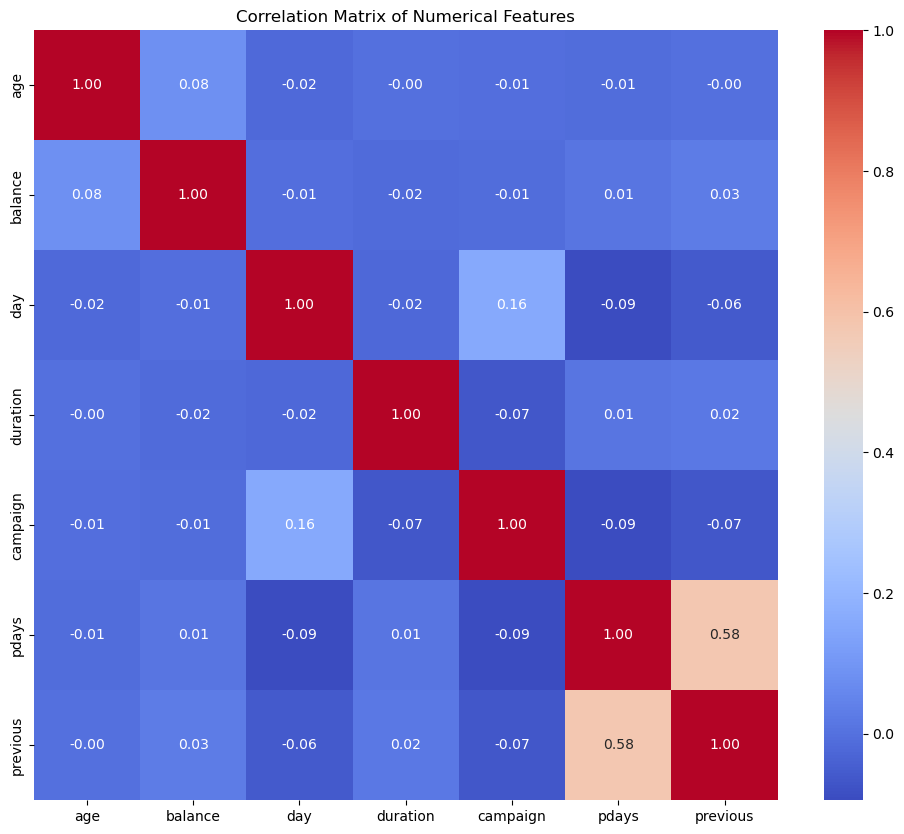

In [19]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Matriks korelasi ini menunjukkan bahwa sebagian besar fitur numerik memiliki korelasi rendah satu sama lain, 
#kecuali `pdays` dan `previous` yang memiliki korelasi sedang (0.58). 
#Hal ini menunjukkan bahwa fitur-fitur tersebut cenderung memberikan informasi yang berbeda dalam dataset.

## Machine Learning

In [13]:
X = df.drop('marital', axis=1)
y = df['marital']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape

((3616, 16), (905, 16))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [20]:
#a. Defining the model
X = df.drop(columns=['y'])  # Asumsikan kolom 'y' sebagai target
y = df['y']

# Jika terdapat variabel kategori, lakukan encoding
X = pd.get_dummies(X, drop_first=True)

# Split data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definisikan model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
#b. Predict the test set results
# Melatih model
rf_model.fit(X_train, y_train)

# Melakukan prediksi pada test set
y_pred = rf_model.predict(X_test)

In [22]:
#c. Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.894620486366986


In [33]:
#d. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1163   42]
 [ 101   51]]


In [32]:
#e. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94      1205
         yes       0.55      0.34      0.42       152

    accuracy                           0.89      1357
   macro avg       0.73      0.65      0.68      1357
weighted avg       0.88      0.89      0.88      1357



In [ ]:
#f. Results and conclusion
#Model Random Forest mencapai akurasi sekitar 89%, menunjukkan performa yang baik secara keseluruhan. 
#Namun, model ini lebih akurat dalam mengidentifikasi kelas "no" dibandingkan "yes". 
#Precision dan recall untuk "yes" rendah, yang menunjukkan model kurang efektif mengenali kategori ini, 
#kemungkinan karena ketidakseimbangan kelas. Penyesuaian lebih lanjut mungkin diperlukan untuk meningkatkan akurasi pada kelas minoritas.

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [25]:
#a. Defining the model
# Menentukan fitur (X) dan target (y)
X = df.drop(columns=['y'])  # Asumsikan 'y' sebagai target
y = df['y']

# Jika ada variabel kategori, lakukan encoding
X = pd.get_dummies(X, drop_first=True)

# Split data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definisikan model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [26]:
#b. Predict the test set results
# Melatih model
gb_model.fit(X_train, y_train)

# Melakukan prediksi pada test set
y_pred = gb_model.predict(X_test)

In [27]:
#c. Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.894620486366986


In [30]:
#d. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1163   42]
 [ 101   51]]


In [31]:
#e. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94      1205
         yes       0.55      0.34      0.42       152

    accuracy                           0.89      1357
   macro avg       0.73      0.65      0.68      1357
weighted avg       0.88      0.89      0.88      1357



In [ ]:
#f. Results and conclusion
#Model Gradient Boosting menghasilkan akurasi sebesar 89%, menunjukkan kinerja yang baik. 
#Namun, serupa dengan Random Forest, model ini lebih baik dalam mengklasifikasikan kelas "no" dengan precision dan recall tinggi. 
#Untuk kelas "yes", precision dan recall lebih rendah, yang mengindikasikan kesulitan model dalam mengenali kategori ini, 
#kemungkinan karena ketidakseimbangan kelas. Perlu penyesuaian lebih lanjut agar performa pada kelas "yes" meningkat.